In [1]:
from fastai.vision.all import *
import torch

In [ ]:
!unzip /content/drive/MyDrive/Datasets/Road_signs_dataset/road_sign_dataset.zip -d /content/dataset

In [ ]:
path = Path('/content/dataset/road_sign_dataset')

In [ ]:
path.ls()

(#46) [Path('/content/dataset/road_sign_dataset/traffic_lights_ahead'),Path('/content/dataset/road_sign_dataset/main_road'),Path('/content/dataset/road_sign_dataset/drive_straight'),Path('/content/dataset/road_sign_dataset/no_entry'),Path('/content/dataset/road_sign_dataset/other_danger'),Path('/content/dataset/road_sign_dataset/end_of_restrictions'),Path('/content/dataset/road_sign_dataset/straight_and_or_right'),Path('/content/dataset/road_sign_dataset/60'),Path('/content/dataset/road_sign_dataset/100'),Path('/content/dataset/road_sign_dataset/20')...]

In [ ]:
dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   splitter = RandomSplitter(valid_pct=0.2, seed=42),
                   get_y = parent_label,
                   item_tfms = Resize(224),
                   batch_tfms = aug_transforms())

dls = dblock.dataloaders(path)

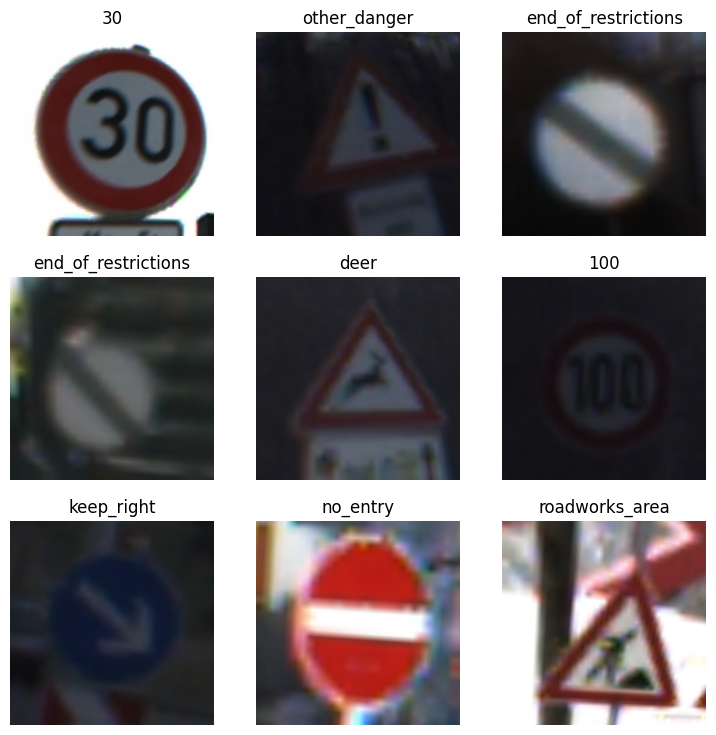

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics = accuracy)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 171MB/s]


SuggestedLRs(valley=0.0010000000474974513)

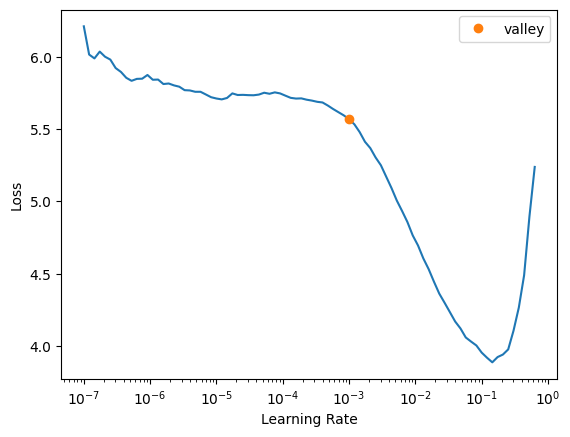

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.664036,0.295515,0.905660,02:12


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,0.180745,0.117996,0.962736,02:41
1,0.115501,0.071347,0.977201,02:41
2,0.058434,0.040330,0.987107,02:42
3,0.018080,0.006178,0.997484,02:41
4,0.006828,0.003226,0.999371,02:41


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

In [ ]:
learn.export('road_sign_model.pkl')

In [2]:
model = load_learner('/content/drive/MyDrive/Datasets/Road_signs_dataset/road_sign_model (1).pkl')

In [3]:
from ipywidgets import widgets
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

intersection_with_side_road_on_both_sides_road
Probability: 100.00%


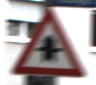

In [4]:
img = PILImage.create(upload.data[-1]) # rasm
pred, _, prob = model.predict(img) # bashorat qilish (predict)
print(pred)
pred_index = model.dls.vocab.o2i[str(pred)]

predicted_class_prob = prob[pred_index].item() * 100
print(f'Probability: {predicted_class_prob:.2f}%')
img